# Standard Scaling (Standardization)

Standard scaling, or **Standardization**, is a technique used to transform data so that it has a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean of each feature from the data and then dividing the result by the feature's standard deviation. The formula for standard scaling is:

**z = (X − μ) / σ**

Where:  
- **X** = the original data point  
- **μ** = the mean of the data  
- **σ** = the standard deviation  

Standard scaling is commonly used in machine learning to ensure that all features contribute equally to the model, preventing features with larger scales from dominating the model’s performance. It is especially important for algorithms like k-nearest neighbors (KNN), support vector machines (SVM), and gradient descent-based methods.


### Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## DataFrame

In [3]:
df=pd.read_csv('../EDA/Titanic-Dataset.csv')
df=df[['Age', 'Survived', 'Fare']]
df=df.dropna()
df.sample(5)

,Age,Survived,Fare
164,1.0,0,39.6875
190,32.0,1,13.0000
842,30.0,1,31.0000
616,34.0,0,14.4000
416,34.0,1,32.5000


### Data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Survived  714 non-null    int64  
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [4]:
df.describe()

,Age,Survived,Fare
count,714.000000,714.000000,714.000000
mean,29.699118,0.406162,34.694514
std,14.526497,0.491460,52.918930
min,0.420000,0.000000,0.000000
25%,20.125000,0.000000,8.050000
50%,28.000000,0.000000,15.741700
75%,38.000000,1.000000,33.375000
max,80.000000,1.000000,512.329200


# Split of data

Spliting the data into train, test, before scaling

In [5]:
X=df[['Age', 'Fare']]
y=df['Survived']
X_train, X_test, Y_train, Y_test=train_test_split(X,y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((571, 2), (143, 2), (571,), (143,))

# Standard Scaler

In [6]:
scaler =StandardScaler() #object instance

In [7]:
# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and test data using the learned scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((571, 2), (143, 2))

In [8]:
scaler.mean_ ,  

(array([30.0169352 , 35.07856042]),)

### Converting the Scalled value in DataFrame

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Comparing the Graph

## Scatter Plot

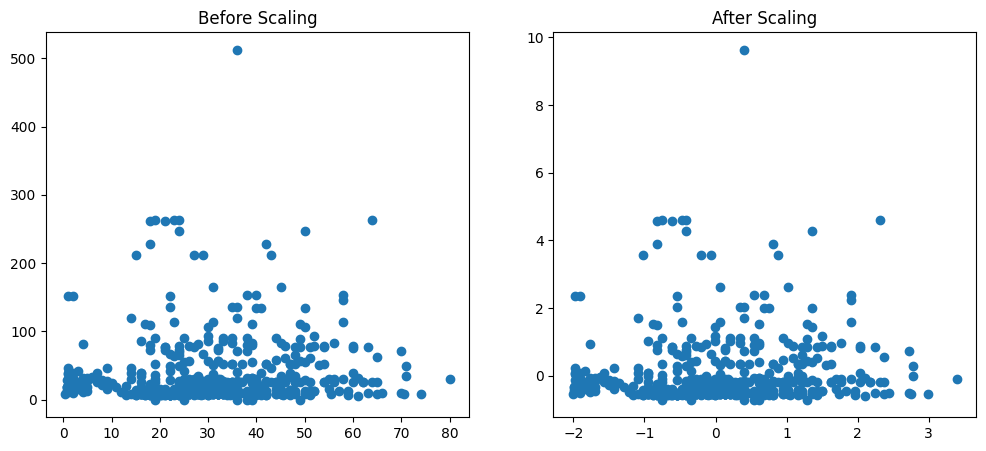

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.scatter(X_train['Age'], X_train['Fare'])
ax1.set_title('Before Scaling')

# After scaling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['Fare'])
ax2.set_title('After Scaling')

plt.show()

In [11]:
X_train_scaled.describe()

,Age,Fare
count,5.710000e+02,5.710000e+02
mean,2.364328e-16,4.977532e-17
std,1.000877e+00,1.000877e+00
min,-2.011210e+00,-7.081945e-01
25%,-6.127307e-01,-5.456746e-01
50%,-1.030808e-01,-3.902207e-01
75%,6.104291e-01,-1.420405e-02
max,3.396515e+00,9.635125e+00


## KDE Plot

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

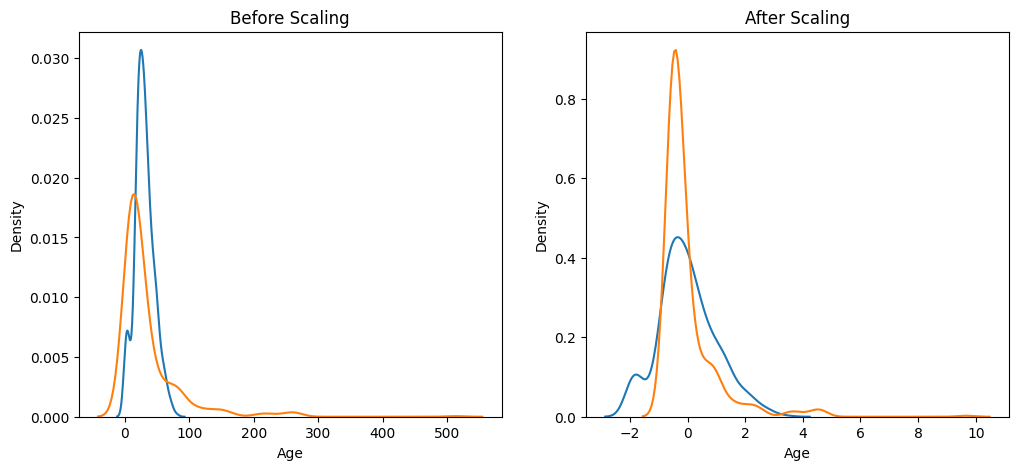

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before Scalling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Fare'], ax=ax1)

#After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Fare'], ax=ax2)


In [13]:
# Step 1: Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Step 2: Create the scaler (default range is 0 to 1)
scaler = MinMaxScaler()

# Step 3: Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(X_train)

# If you have training and test sets, use fit on train and transform on both:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training

In [14]:
lr= LogisticRegression() 
lr.fit(X_train, Y_train)
y_pred=lr.predict(X_test)
print(f'Accuracy Sore: {accuracy_score(y_pred, Y_test)}')

lr_scaled= LogisticRegression()
lr_scaled.fit(X_train_scaled, Y_train)
y_scaled_pred=lr_scaled.predict(X_test_scaled)
print(f'Accuracy Sore: {accuracy_score(y_scaled_pred, Y_test)}')

Accuracy Sore: 0.6293706293706294
Accuracy Sore: 0.6573426573426573


Here we have improvemnt in the accuracy when we scaled the value.

# Min Max Scalling 

### Min-Max Scaling

Min-max scaling (or normalization) is a technique used to rescale data into a specific range, typically `[0, 1]`.  
It is performed by subtracting the minimum value of the dataset from each data point and then dividing the result by the range of the dataset (i.e., the difference between the maximum and minimum values).

#### Formula:

$$
X_{\text{scaled}} = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

**Where:**

- $X$ → original value  
- $\min(X)$ → minimum value in the dataset  
- $\max(X)$ → maximum value in the dataset  
- $X_{\text{scaled}}$ → scaled value between 0 and 1  


This transformation ensures:
- The smallest value becomes **0**  
- The largest value becomes **1**  
- All other values are proportionally scaled between 0 and 1.

#### Use Cases:
Min-max scaling is commonly used in machine learning algorithms that are sensitive to data scale, such as:
- **Neural Networks**
- **K-Nearest Neighbors (KNN)**
- **Support Vector Machines (SVM)**


In [15]:
min_max_scaled = MinMaxScaler()     #object instance

In [16]:
# Fit the scaler to the training data
min_max_scaled = MinMaxScaler()
min_max_scaled.fit(X_train)

# Transform both the training and test data
min_max_train = min_max_scaled.transform(X_train)
min_max_test = min_max_scaled.transform(X_test)


In [17]:
#Convert the data into DataFrame
min_max_train=pd.DataFrame(min_max_train, columns=X_train.columns)
min_max_test=pd.DataFrame(min_max_test, columns=X_train.columns)

# Graph Compression

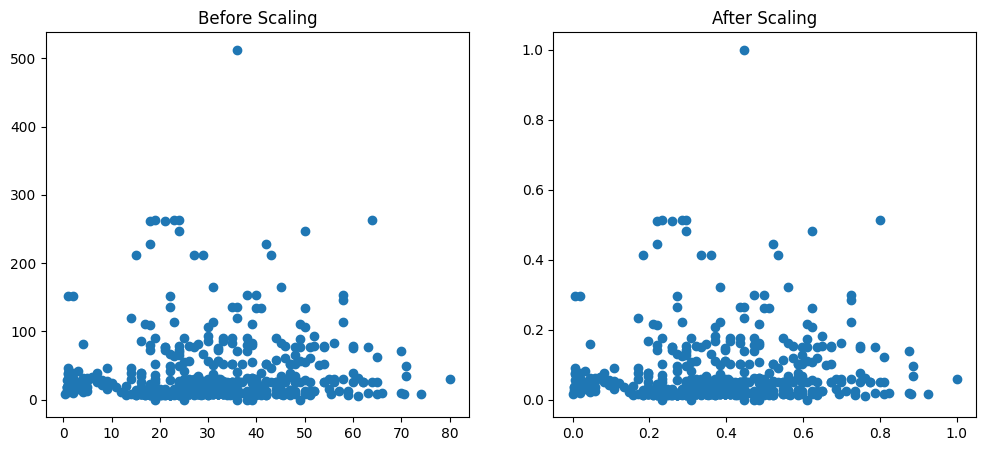

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.scatter(X_train['Age'], X_train['Fare'])
ax1.set_title('Before Scaling')

# After scaling
ax2.scatter(min_max_train['Age'], min_max_train['Fare'])
ax2.set_title('After Scaling')

plt.show()

# Model Training

In [19]:
print(f'Accuracy Sore Without Scale: {accuracy_score(y_pred, Y_test)}')

lr_scaled_min_max = LogisticRegression()
lr_scaled_min_max.fit(min_max_train, Y_train)  # Fit with scaled training data
y_scaled_pred_min_max = lr_scaled_min_max.predict(min_max_test)  # Predict with scaled test data
print(f'Accuracy Score With Scale: {accuracy_score(y_scaled_pred_min_max, Y_test)}')

Accuracy Sore Without Scale: 0.6293706293706294
Accuracy Score With Scale: 0.6573426573426573
